<main style="font-family: TeX Gyre Termes; font-size: 1.2rem">

### MEX #5 - Geyzson Kristoffer
SN:2023-21036

https://uvle.upd.edu.ph/mod/assign/view.php?id=547271

<hr>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Problem a

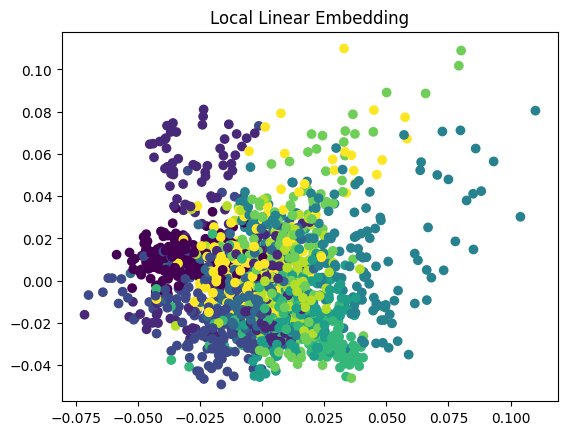

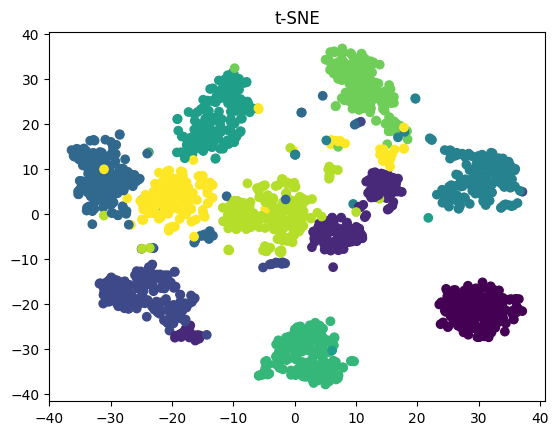

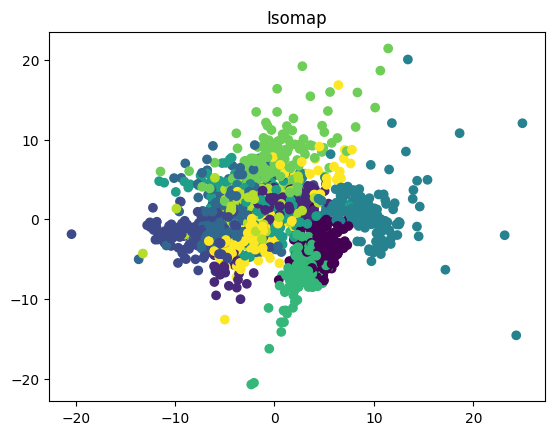

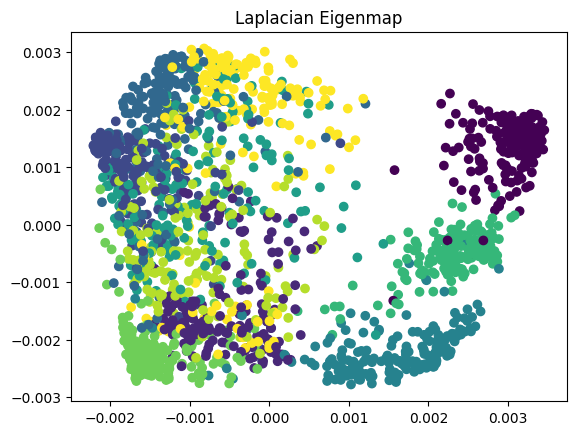

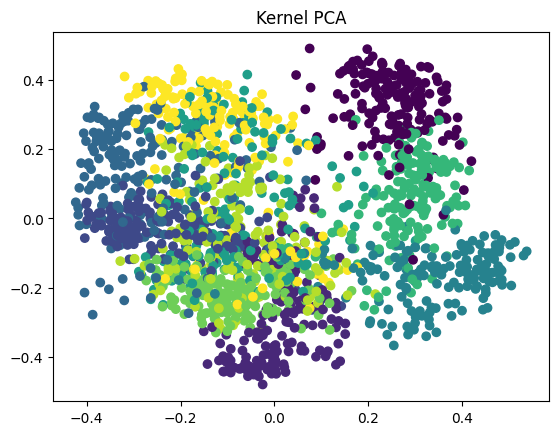

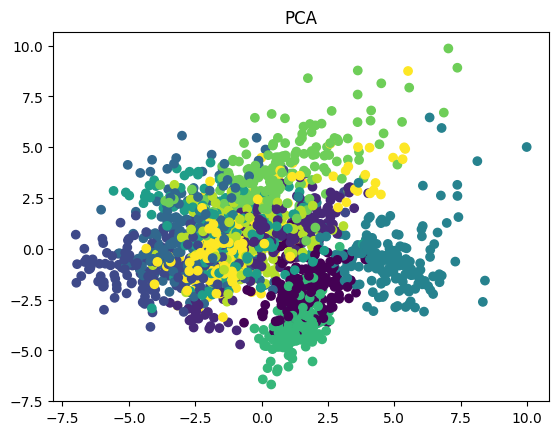

In [21]:
# Load the data
X, y = load_digits(return_X_y=True)

# for testing purposes
# X = [x for x, y in zip(X, y) if y in [8, 9]]
# y = [y for y in y if y in [8, 9]]

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create the LLE model
lle = LocallyLinearEmbedding(n_neighbors=200, random_state=0, n_components=2)
X_lle = lle.fit_transform(X)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y)
plt.title('Local Linear Embedding')
plt.show()

# Create the t-SNE model
tsne = TSNE(perplexity=50, random_state=0, n_components=2)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE')
plt.show()

# Create the Isomap model
isomap = Isomap(n_neighbors=200, n_components=2)
X_isomap = isomap.fit_transform(X)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
plt.title('Isomap')
plt.show()

# Create the Laplacian Eigenmap model
laplacian = SpectralEmbedding(n_neighbors=200, n_components=2)
X_laplacian = laplacian.fit_transform(X)
plt.scatter(X_laplacian[:, 0], X_laplacian[:, 1], c=y)
plt.title('Laplacian Eigenmap')
plt.show()

# Create the Kernel PCA model
kpca = KernelPCA(kernel='rbf', gamma=0.01, n_components=2)
X_kpca = kpca.fit_transform(X)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Kernel PCA')
plt.show()

# Create the PCA model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA')
plt.show()


Question:
Which of the methods produced clear clusters of data points?

Answer:
The method that produced the clearest clusters of data points is the t-SNE. The reason might be because it is a non-linear dimensionality reduction technique that it can capture much more complex relationships among the data. Since the digit dataset tend to really have distinct characteristics from one another, t-SNE produced the clearest separation of clusters.

# Problem b

In [19]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)


# Kernel PCA
model = make_pipeline(StandardScaler(), KernelPCA(kernel='sigmoid', n_components=40), SVC())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"KernelPCA Accuracy: {accuracy_score(y_test, y_pred)*100 :.2f}%")
print(f"KernelPCA F1-score: {f1_score(y_test, y_pred, average='macro')*100 :.2f}%")

# SVC
model = make_pipeline(StandardScaler(), SVC())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"SVC Accuracy: {accuracy_score(y_test, y_pred)*100 :.2f}%")
print(f"SVC F1-score: {f1_score(y_test, y_pred, average='macro')*100 :.2f}%")




KernelPCA Accuracy: 98.89%
KernelPCA F1-score: 98.89%
SVC Accuracy: 98.33%
SVC F1-score: 98.33%


Question:
Which of the two methods had a better test performance for classification? Why?

Answer:
The method that includes the dimensionality reduction before the SVC performed better than the vanilla SVC. One of the reasons might be that noise from data that doesnt really help in predicting the digits has been reduced. This means that only high quality data, data of which represents the whole dataset, are being used. Which makes the model with Kernel PCA dimensionality reduction a better model in terms of accuracy and F1-score.
